## LOADING PLOT IRIS DATASET

A PCA loading plot in Python helps to visualize how original features contribute to the principal components to understand which variables have the most influence on the transformed data. Remember that the loadings (or weights) are the correlation coefficients between the original features and the principal components.

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [2]:
# load features and targets separately
iris = datasets.load_iris()
X = iris.data
y = iris.target
 
# Scale Data 
x_scaled = StandardScaler().fit_transform(X)
 
# Perform PCA on Scaled Data
pca = PCA(n_components=2)

 
pca_features = pca.fit_transform(x_scaled)
 
# Principal components correlation coefficients
loadings = pca.components_
 
# Number of features before PCA
n_features = pca.n_features_in_
 
# Feature names before PCA
feature_names = iris.feature_names
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2
feature_names,,
sepal length (cm),0.521066,0.377418
sepal width (cm),-0.269347,0.923296
petal length (cm),0.580413,0.024492
petal width (cm),0.564857,0.066942


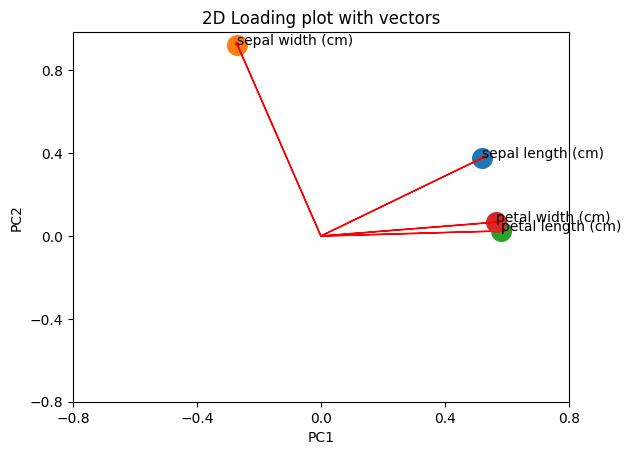

In [3]:
# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]
 
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 
# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('2D Loading plot with vectors')
plt.show()

In [4]:
# Create DataFrame from PCA
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])
 
# Map Targets to names
target_names = {
    0:'setosa',
    1:'versicolor', 
    2:'virginica'
}
 
pca_df['target'] = y
pca_df['target'] = pca_df['target'].map(target_names)
 
# Scale PCS into a DataFrame
pca_df_scaled = pca_df.copy()
 
scaler_df = pca_df[['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min())
 
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]
 
pca_df_scaled

,PC1,PC2,target
0,-0.372175,0.089887,setosa
1,-0.341980,-0.126234,setosa
2,-0.388531,-0.064023,setosa
3,-0.377875,-0.111864,setosa
4,-0.392741,0.121122,setosa
...,...,...,...
145,0.307394,0.072461,virginica
146,0.257119,-0.167908,virginica
147,0.249985,0.050384,virginica
148,0.225600,0.189361,virginica


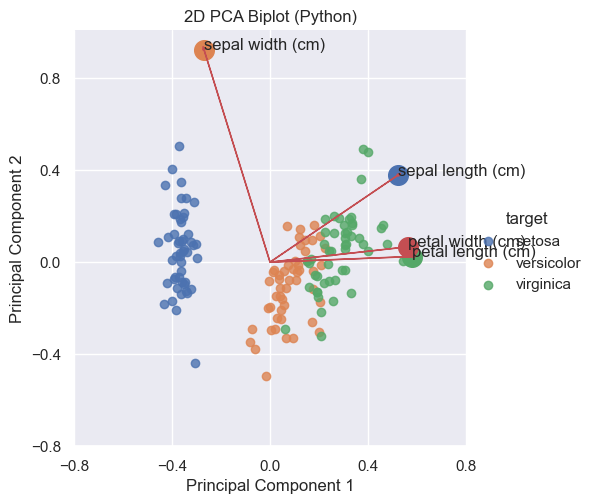

In [5]:
sns.set()
 
xs = loadings[0]
ys = loadings[1]
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df_scaled, 
    fit_reg=False,hue='target'
    )

for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
 
plt.title('2D PCA Biplot (Python)')
plt.show()

In [6]:
loadings_df

,PC1,PC2
feature_names,,
sepal length (cm),0.521066,0.377418
sepal width (cm),-0.269347,0.923296
petal length (cm),0.580413,0.024492
petal width (cm),0.564857,0.066942


In [7]:
# Petal width and petal length are closely correlated while sepal length and sepal width are not. 